# D599 Task 2: Data Exploration

## Part 1: Univariate and Bivariate Statistical Analysis and Visualization

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu

df = pd.read_excel('C:/Users/jcaye/Downloads/Health Insurance Dataset.xlsx')
df

,age,sex,bmi,children,smoker,region,charges,Level,score
0,19,female,27.900,0,yes,southwest,16884.92400,B,72
1,18,male,33.770,1,no,southeast,1725.55230,C,69
2,28,male,33.000,3,no,southeast,4449.46200,B,90
3,33,male,22.705,0,no,northwest,21984.47061,A,47
4,32,male,28.880,0,no,northwest,3866.85520,C,76
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,B,90
1334,18,female,31.920,0,no,northeast,2205.98080,C,83
1335,18,female,36.850,0,no,southeast,1629.83350,B,61
1336,21,female,25.800,0,no,southwest,2007.94500,D,76


In [58]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
Level        object
score         int64
dtype: object

### Part A

<pre>
    Univariate Statistics
    continuous variables: Charges, BMI | describe() and boxplot for visualization
    categorical variables: Sex, Smoker | value_counts() and pie chart for visualization
</pre>

In [59]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

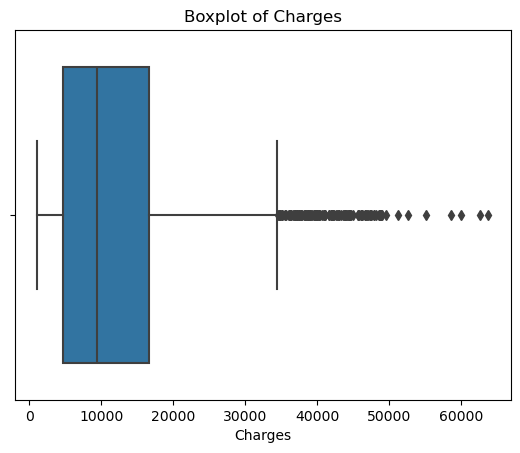

In [60]:
sns.boxplot(x='charges', data=df)

plt.title('Boxplot of Charges')
plt.xlabel('Charges')

# Show the plot
plt.show()

In [61]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

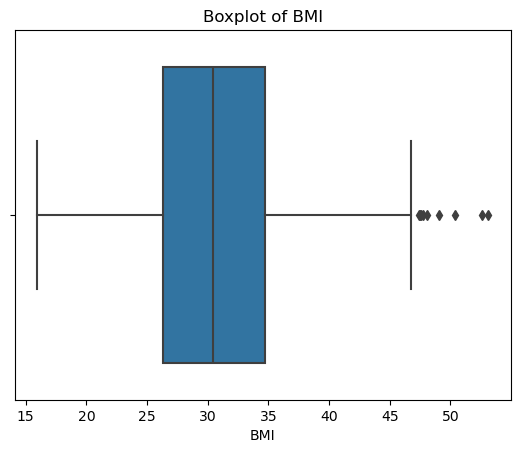

In [62]:
sns.boxplot(x='bmi', data=df)

plt.title('Boxplot of BMI')
plt.xlabel('BMI')

# Show the plot
plt.show()

In [63]:
df['sex'].value_counts(normalize=True)

sex
male      0.505232
female    0.494768
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x13353c13690>,
 [Text(-1.0998514287589123, -0.01807856899700492, 'male'),
  Text(1.0998514287589123, 0.018078568997005273, 'female')],
 [Text(-0.5999189611412249, -0.009861037634729954, '50.5%'),
  Text(0.5999189611412248, 0.009861037634730148, '49.5%')])

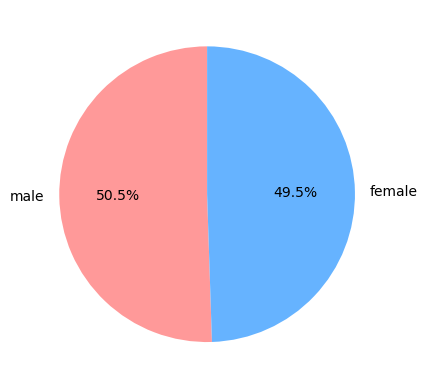

In [64]:
sex_counts = df['sex'].value_counts()
plt.pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

In [65]:
df['smoker'].value_counts(normalize=True)

smoker
no     0.795217
yes    0.204783
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x13353e2e8d0>,
 [Text(-0.6598631335250117, -0.8801026332278258, 'no'),
  Text(0.6598631335250118, 0.8801026332278258, 'yes')],
 [Text(-0.3599253455590972, -0.48005598176063213, '79.5%'),
  Text(0.3599253455590973, 0.48005598176063213, '20.5%')])

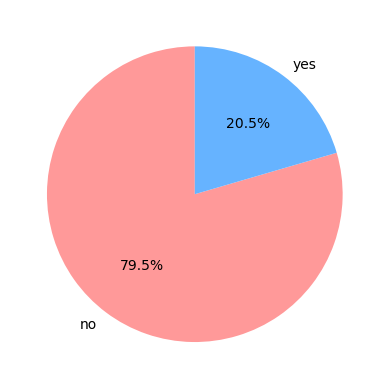

In [66]:
smoker_counts = df['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])

### Part B

<pre>
    Bivariate Statistics
    continuous variables: Charges, BMI 
    categorical variables: Sex, Smoker 
    
    3 types of bivariate statistics:
    continuous-continous Charges vs. BMI (scatterplot)
    categorical-continuous Charges Smoker (boxplot or T-test) 
    categorical-categorical Sex vs Smoker (contingency tables)
</pre> 

#### Continuous vs. Continous, BMI vs. Charges

In [67]:
bmi_charges_corr = df[['bmi', 'charges']].corr(method='pearson')
print(bmi_charges_corr)

              bmi   charges
bmi      1.000000  0.198341
charges  0.198341  1.000000


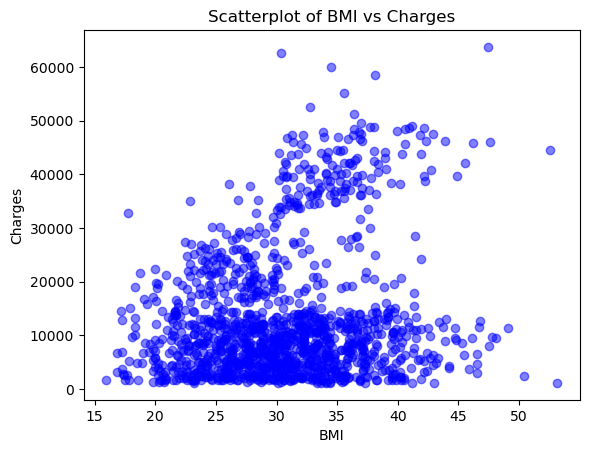

In [68]:
plt.scatter(df['bmi'], df['charges'], color='blue', alpha=0.5)

plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Scatterplot of BMI vs Charges')

plt.show()

#### Continous vs. Categorical, Charges vs. Smoker

In [69]:
descriptive_stats = df.groupby('smoker')['charges'].describe()

print(descriptive_stats)

         count          mean           std         min           25%  \
smoker                                                                 
no      1064.0   8434.268298   5993.781819   1121.8739   3986.438700   
yes      274.0  32050.231832  11541.547176  12829.4551  20826.244213   

                50%           75%          max  
smoker                                          
no       7345.40530  11362.887050  36910.60803  
yes     34456.34845  41019.207275  63770.42801  


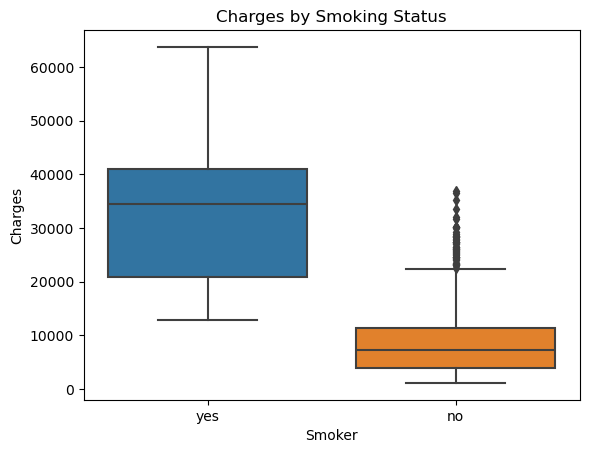

In [70]:
sns.boxplot(x='smoker', y='charges', data=df)

# Add title and labels
plt.title('Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')

# Show the plot
plt.show()

#### Categorical vs, Categorical, Sex vs. Smoker

In [71]:
cross_tab = pd.crosstab(df['sex'], df['smoker'], normalize='index')
cross_tab

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764793,0.235207


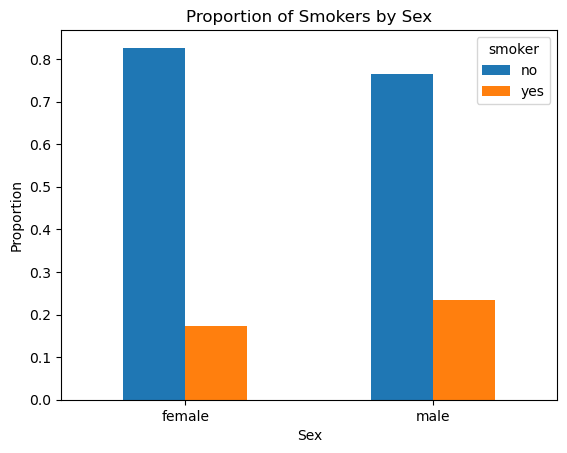

In [72]:
proportions = df.groupby('sex')['smoker'].value_counts(normalize=True).unstack()

proportions.plot(kind='bar')
plt.title('Proportion of Smokers by Sex')
plt.ylabel('Proportion')
plt.xlabel('Sex')
plt.xticks(rotation=0)
plt.show()

## Part II: Parametric Statistical Testing

<b>Research Question:</b> Is there a significant difference in the mean BMI between males and females?

To answer the research question, the variables in the dataset that need to be used are 'bmi' and 'sex'. The 'bmi' variable is a continous variable and it measures the body mass index. The 'sex' variable is a categorical variable that has two groups: males and females. The mean BMI of males will be compared to the mean BMI of females to see if there is a significant difference in BMI between the two groups. 

The parametric statistical test that will be used to answer the research question is the independent t-test. The independent t-test compares the means of two independent groups. This test perfectly fits with our research question because we want to know if there is a significant difference in the average BMIs between the two groups: males and females. 

<pre>
    Null Hypothesis (H0): μmale = μfemale
    There is no significant difference in the mean BMI between males and females.

    Alternative Hypothesis (H1): μmale =/= μfemale
    There is a significant difference in the mean BMI between males and females.
</pre>

C:\Users\jcaye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jcaye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


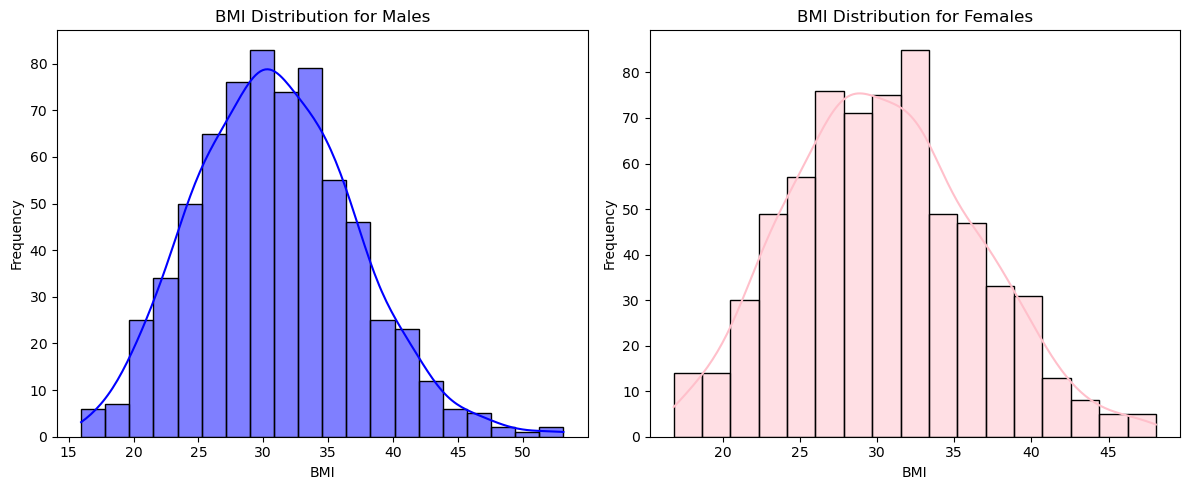

In [73]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df[df['sex'] == 'male']['bmi'], kde=True, color='blue')
plt.title('BMI Distribution for Males')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df[df['sex'] == 'female']['bmi'], kde=True, color='pink')
plt.title('BMI Distribution for Females')
plt.xlabel('BMI')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



In [74]:
bmi_females = df[df['sex'] == 'female']['bmi']
bmi_males = df[df['sex'] == 'male']['bmi']

# Perform the independent t-test
t_statistic, p_value = ttest_ind(bmi_females, bmi_males)

print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: -1.696752635752224
P-value: 0.08997637178984932


In the code, the BMI values for females is being stored into the variable 'bmi_females', while the BMI for males is being stored into the variable 'bmi_males'. We're performing the independent t-test by using the ttest_ind() function to compare the BMI means of males and females. The ttest_ind() function will return two values, which are t-statistic and p_value. 

Since the p-value is more than the 0.05 significance level, we fail to reject the null hypothesis and conclude that there is no significant difference in the mean BMI between males and females. Regarding the t-statistic value, it indicates that the difference in BMI means between males and females is 1.6967 standard errors away from zero. Since the value of t-statistic is negative, it indicates that females have slightly higher BMI than males.

E1. I chose to use independent t-test because it compares the means of a continuous variable between two unrelated groups. Since the variable 'bmi' is a continuous variable and the variable 'sex' is a categorical variable with two groups: males and females, it is suitable to use independent t-test with those variables. 

E2. After performing the independent t-test involving the BMIs of males and females, it returns a T-statistic value of -1.69 and a p-value of 0.08. The T-statistic value means there is a moderate difference between the BMI means of males and females, and since it is negative, it indicates that females have slightly higher BMI values than males. The p-value is 0.08 which is less than the 0.05 significance level. This means we fail to reject the null hypothesis and conclude there is no significant difference in BMI between males and females. 

E3. Using the independent t-test on variables 'bmi' and 'sex', it benefits the stakeholders in a couple of ways. First, if a significant difference is found in BMI between males and females, stakeholders can use this result to design targeted health programs for the group with higher BMI, leading to better health outcomes. Second, using a parametric test like independent t-test allows organizations to develop health strategies with the help of actual data instead of assumptions.

F1. Based on the result from the independent t-test, the answer to the question "Is there a significant difference in the mean BMI between males and females?" is no. There is no significant difference in the mean BMI between males and females at the 0.05 significance level. The p-value (0.089) is greater than 0.05, so we failed to reject the null hypothesis. It is safe to conclude that sex alone may not be a key factor in influencing BMI at least in this dataset. 

F2. There are limitations to my data analysis. The first limitation is I did not get to check the BMI variable for outliers. Independent t-tests are sensitive to outliers, so by not removing the outliers from the 'bmi' column, the outliers can affect the mean and potentially skew the results. Another limitation is the independent t-test only analyzes the relationship between two variables without considering other variables that might influence the results. In our case, only the variables 'sex' and 'bmi' were analyzed by the independent t-test and nothing else. It did not consider any variables like age or region in the data where it could influence BMI.

F3. Based on the findings, we can follow some recommended courses of actions. First, since there is no significant difference in BMI between males and females, there is no need to create gender-specific health and wellness programs based solely on BMI. Both genders can be treated similarly regarding BMI in health plans and programs. Second, it would be better for organizations to focus on developing programs that emphasize healthy habits for everyone, regardless of gender.

F4. The code that I used to conduct parametric statistical testing is in the "D599_Task_2.ipynb" file.

## Part III: Nonparametric Statistical Testing

<b>Research Question:</b> Do smokers have significantly higher insurance charges than non-smokers? 

To answer the research question, the variables in the dataset that need to be used are 'smoker' and 'charges'. The 'charges' variable is a continuous variable and it contains the insurance charges for each individual. The 'smoker' variable is a categorical variable that has two groups: smokers and non-smokers. The distribution of insurance charges for smokers will be compared to the distribution of insurance charges for non-smokers to see if smokers have significantly higher insurance charges. 

The non-parametric statistical test that will be used to answer the research question is the Mann-Whitney U test. The Mann-Whitney U test compares two independent groups to see if one group tends to have higher or lower values than the other group. In our case, we are using the Mann-Whitney U test to see whether smokers tend to have significantly higher insurance charges than non-smokers. The Mann-Whitney U test is also a good fit because the distributions for both smokers and non-smokers are skewed and do not follow a normal distribution.

<pre>
    Null Hypothesis (H0): MEDsmokers = MEDnonsmokers
    The distribution of insurance charges for smokers is equal to the distribution of insurance charges for non-smokers.

    Alternative Hypothesis (H1): MEDsmokers > MEDnonsmokers
    The distribution of insurance charges for smokers is greater than the distribution of insurance charges for non-smokers.
</pre>

C:\Users\jcaye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jcaye\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


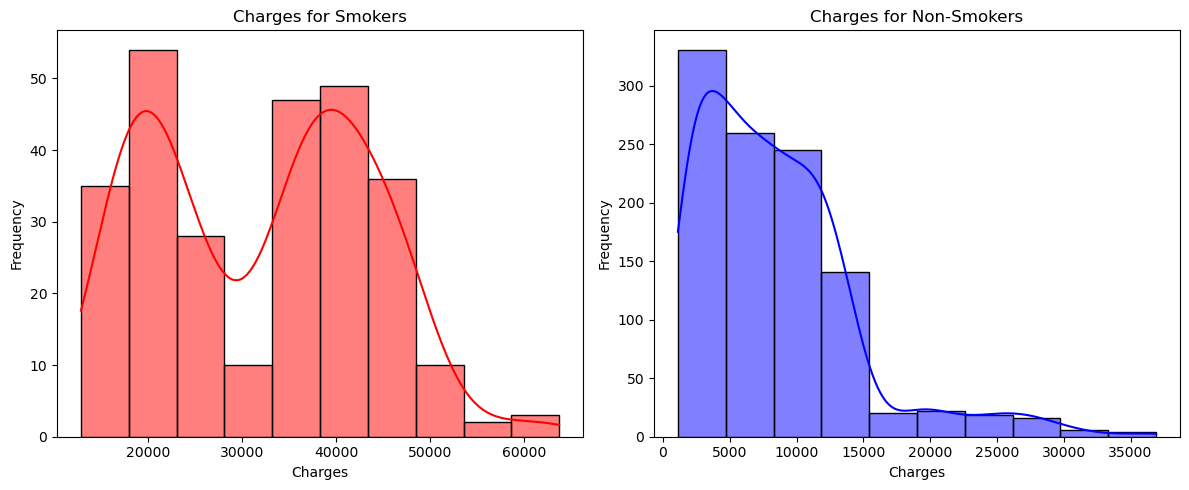

In [75]:
smokers_charges = df[df['smoker'] == 'yes']['charges']
non_smokers_charges = df[df['smoker'] == 'no']['charges']


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(smokers_charges, color='red', kde=True, label='Smokers', bins=10)
plt.title('Charges for Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(non_smokers_charges, color='blue', kde=True, label='Non-Smokers', bins=10)
plt.title('Charges for Non-Smokers')
plt.xlabel('Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [76]:
smokers_charges = df[df['smoker'] == 'yes']['charges']
non_smokers_charges = df[df['smoker'] == 'no']['charges']

u_statistic, p_value = mannwhitneyu(smokers_charges, non_smokers_charges, alternative='greater')

print(f"U-statistic: {u_statistic}")
print(f"P-value: {p_value}")

U-statistic: 284133.0
P-value: 2.6351167222517853e-130


In this code, the insurance charges for smokers are stored in the variable 'smokers_charges', while the insurance charges for non-smokers are stored in the variable 'non_smokers_charges'. We're performing the Mann-Whitney U test by using the mannwhitneyu() function to see whether smokers tend to have significantly higher insurance charges than non-smokers. For the alternative parameter, I used 'greater' because our research question has a one-sided hypothesis where smokers are expected to have higher insurance charges than non-smokers. The mannwhitney() function will return two values, which are u-statistic and p_value.

Based on the Mann-Whitney U test results, the p value is less than the 0.05 significance level, which means we can confidently reject the null hypothesis and conclude that the distribution of insurance charges for smokers is greater than the distribution of insurance charges for non-smokers. Regarding the u-statistic value, it is quite large, which indicates that the smokers group tends to have higher insurance charges than the non-smokers group. 

I1. I chose to use the Mann-Whitney U test for two reasons. The first reason is because the distributions for both smokers and non-smokers are skewed and do not follow a normal distribution. A non-parametric test like the Mann-Whitney U test is appropriate for skewed data like this. The second reason is about the variables. The 'smoker' variable has two independent groups: smokers and non-smokers. The Mann-Whitney U test is designed to compare two independent groups. Also, the 'charges' variable is a continuous variable, which the function uses to compare between two groups.

I2. After performing the Mann-Whitney U test, it returns a u-statistic value of 284133.0 and p-value of 2.6-130. Since the u-statistic value is fairly large, it means that the values in the smokers group tend to rank higher than the values in the non-smokers group. The p-value has a value of 2.6-130 which is smaller than the 0.05 significance level. Therefore, we can reject the null hypothesis and conclude that smokers have significantly higher insurance charges than non-smokers.

I3. Using the Mann-Whitney U test on variables 'smoker' and 'charges', it benefits the stakeholders in a couple of ways. First, by having this information about smokers having higher insurance charges than non-smokers, it justifies their action of increasing premium rates for high-risk groups like smokers. Second, having the test results from the Mann-Whitney U test will allow marketing to develop targeted insurance products that address the needs of smokers.

J1. Based on the results from the Mann-Whitney U test, the answer to the question "Do smokers have significantly higher insurance charges than non-smokers?" is yes. Smokers tend to have significantly higher insurance charges than non-smokers. The extremely low p-value (2.6-130) from the test allows us to reject the null hypothesis, and conclude that smoking status is associated with higher insurance charges. 

J2. There are limitations to my data analysis. The first limitation is the Mann-Whitney U test compares only two independent groups in a categorical variable. It is not possible to use the Mann-Whitney U test if you want to compare more than two independent groups. The second limitation is that the Mann-Whitney U test does not provide the exact measure of how high the insurance charges for smokers are compared to non-smokers. We have to use descriptive statistical methods like the interquartile range to really understand the magnitude of differences between the two groups. 

J3. Based on the findings, we can follow some recommended courses of actions. First, organizations can implement higher premiums for smokers to reflect the increased costs associated with smokers. This helps organizations manage their costs more effectively. Second, organizations can offer discounted premiums to smokers who successfully quit smoking. This helps reduce insurance claims while also promoting healthier behaviors.

J4. The code that I used to conduct non-parametric statistical testing is in the "D599_Task_2.ipynb" file.